In [1]:
from pathlib import Path
from mare.analysis import RequirementsPreprocessor, NLPAnalyzer, LDAAnalyzer

In [2]:
path_to_requirements = Path('..', 'crowdre_cleaned-csv', 'requirements.csv')
preprocessor = RequirementsPreprocessor(path_to_requirements)
preprocessor._preprocess_requirements()

Number of Tokens (unique): 		87542 (4968)
Number of Lexical Words: 		49374

Vocabulary Size (Lexical Words): 	4851
Vocabulary Size (Stems): 		3242

Average Sentence Length (Tokens): 	30
Average Sentence Length (Lexical Words):17

Lexical Diversity: 			0.011
Requirements containing
	'...I want my smart home to...': 	416/2966 (14.03%)


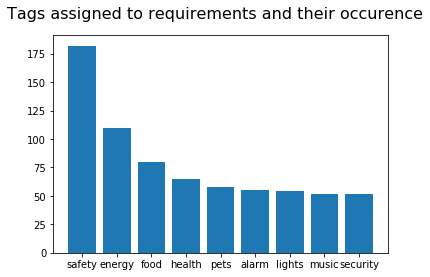

Total amount of tags: 5232
Requirements with tags: 2592 (87.39%)
Tags per Requirement: min: 0, avg: 1, max: 11


In [3]:
nlp = NLPAnalyzer(preprocessor.requirements)

nlp.analyze_vocabulary()
nlp.analyze_tags()

In [3]:
lda = LDAAnalyzer(preprocessor.requirements)
lda.prepare()
lda.test_preparation()

Word 14 ("hous") appears 1 time.
Word 16 ("occup") appears 1 time.
Word 79 ("time") appears 1 time.
Word 129 ("notifi") appears 1 time.
Word 165 ("potenti") appears 1 time.
Word 212 ("avoid") appears 1 time.
Word 220 ("without") appears 1 time.
Word 225 ("enjoy") appears 1 time.


In [4]:
lda.bag_of_words()

Topic: 0
Words: 0.050*"owner" + 0.042*"door" + 0.021*"occup" + 0.020*"alert" + 0.020*"smart" + 0.020*"clean" + 0.019*"automat" + 0.018*"time" + 0.017*"dont" + 0.017*"hous"

Topic: 1
Words: 0.039*"occup" + 0.032*"turn" + 0.026*"save" + 0.026*"owner" + 0.025*"air" + 0.023*"electr" + 0.020*"automat" + 0.018*"bill" + 0.017*"energi" + 0.017*"heat"

Topic: 2
Words: 0.036*"get" + 0.032*"owner" + 0.030*"occup" + 0.028*"smart" + 0.027*"parent" + 0.024*"dont" + 0.022*"time" + 0.020*"temperatur" + 0.019*"hous" + 0.015*"lock"

Topic: 3
Words: 0.044*"occup" + 0.031*"time" + 0.030*"light" + 0.025*"room" + 0.024*"turn" + 0.023*"owner" + 0.020*"smart" + 0.020*"automat" + 0.018*"pet" + 0.018*"open"

Topic: 4
Words: 0.052*"occup" + 0.050*"water" + 0.042*"pet" + 0.040*"owner" + 0.035*"save" + 0.031*"energi" + 0.031*"smart" + 0.022*"use" + 0.017*"alert" + 0.016*"know"

Topic: 5
Words: 0.035*"cook" + 0.032*"parent" + 0.026*"occup" + 0.019*"owner" + 0.018*"know" + 0.018*"water" + 0.017*"smart" + 0.017*"door

In [5]:
lda.tf_idf()

Topic: 0
Word: 0.014*"occup" + 0.013*"coffe" + 0.012*"save" + 0.012*"run" + 0.011*"turn" + 0.011*"light" + 0.010*"low" + 0.010*"owner" + 0.010*"automat" + 0.010*"time"

Topic: 1
Word: 0.019*"energi" + 0.018*"door" + 0.013*"owner" + 0.013*"use" + 0.013*"automat" + 0.013*"occup" + 0.012*"dog" + 0.012*"lock" + 0.012*"turn" + 0.011*"smart"

Topic: 2
Word: 0.016*"water" + 0.015*"occup" + 0.013*"room" + 0.013*"dont" + 0.013*"owner" + 0.013*"hous" + 0.013*"light" + 0.012*"get" + 0.011*"smart" + 0.011*"music"

Topic: 3
Word: 0.023*"clean" + 0.016*"occup" + 0.015*"cook" + 0.015*"smart" + 0.013*"vacuum" + 0.012*"automat" + 0.011*"owner" + 0.011*"door" + 0.011*"lock" + 0.011*"hous"

Topic: 4
Word: 0.019*"save" + 0.016*"room" + 0.016*"light" + 0.015*"occup" + 0.015*"system" + 0.014*"electr" + 0.014*"know" + 0.014*"owner" + 0.014*"parent" + 0.013*"time"

Topic: 5
Word: 0.017*"owner" + 0.016*"light" + 0.016*"safe" + 0.015*"alert" + 0.015*"turn" + 0.013*"hous" + 0.013*"smart" + 0.012*"occup" + 0.011*

In [8]:
from mare.analysis import RequirementsAnalyzer
import gensim

class Word2VecAnalyzer(RequirementsAnalyzer):

    def word2vec(self):
        tokenized_sentences = list(map(lambda re: re.tokens, self.requirements_list))
        self.model = gensim.models.Word2Vec(tokenized_sentences, min_count=5, size=50)
    
word_2_vec = Word2VecAnalyzer(preprocessor.requirements)
word_2_vec.word2vec()

In [9]:
word_2_vec.model.wv.words_closer_than("owner", "want")

['a', 'As', 'home', 'occupant', 'smart', 'parent', 'pet']

In [ ]:
#TODO: Continue with proper embeddings